问题一、线性回归模型的形成

1、损失函数——最小二乘，原因在于求导方便
2、输入——数值型x，x需要归一化（问题：原因暂不明确），数值型y
3、模型如何拟合，梯度下降

问题二、线性回归模型的适用

1、优点：简单直观可解释，根据系数可解释特征重要性，不仅可以用于拟合模型，还可以选择特征

问题：什么时候可以用线性回归模型来选择特征呢，
回答：画图，将单个x拿出来跟y

问题：如果x和y并不存在线性关系，但是可能多项式或者log等存在该如何判别呢


3、如何判断一组数据可以用线性回归：直接拟合，查看结果（问题：此处不明确，而且如果是logy和x存在线性或者其他变式该如何分析）

模型构建过程：

预备：定义损失函数，随即生成小批量数据，初始化参数并构建模型生成y_hat
模型训练：制定训练次数epoch，每次训练先计算loss，再反向传播，产生梯度更新参数，梯度清零再次进行下一次更新

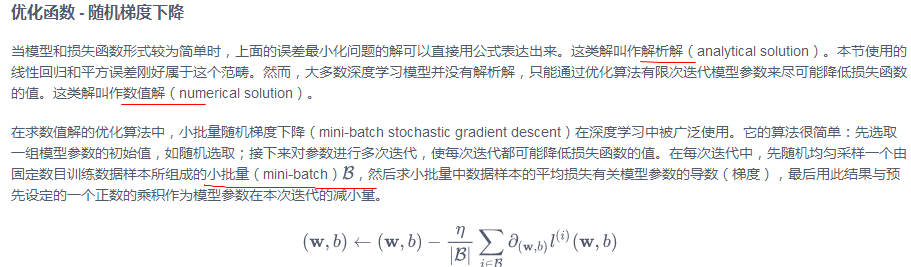

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    
    ##打乱数据索引 ，随即采样形成batch
    indices = list(range(num_examples))
    random.shuffle(indices)  # random read 10 samples
    for i in range(0, num_examples, batch_size):
        ##在i到i+10中取样，如果已经取到大于样本数的话，则取i到样本数
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # the last time may be not enough for a whole batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [ ]:
#训练函数时，要进行梯度清零，否则在下一次梯度下降时会累加
w.grad.data.zero_()
b.grad.data.zero_()

In [ ]:
问题：view也就是练习题的第二题

# softmax函数



将V‘的每个值减去向量中的最大值（避免极大值导致的0，1极端分布），之后求e的xi次方之和，每个值的e的x次放除以之和，得到概率分布

漂亮的导数形式，便于反向传播计算
具有良好的数据压缩能力是实数域R→[ 0 , 1 ]的映射函数，
可以将杂乱无序没有实际含义的数字直接转化为每个分类的可能性概率。


相同的，他们具有着不同的特点，sigmoid函数可以看成softmax函数的特例，softmax函数也可以看作sigmoid函数的推广。
1.sigmoid函数前提假设是样本服从伯努利 (Bernoulli) 分布的假设，而softmax则是基于多项式分布。首先证明多项分布属于指数分布族，这样就可以使用广义线性模型来拟合这个多项分布，由广义线性模型推导出的目标函数即为Softmax回归的分类模型。 

2.sigmoid函数用于分辨每一种情况的可能性，所以用sigmoid函数实现多分类问题的时候，概率并不是归一的，反映的是每个情况的发生概率，因此非互斥的问题使用sigmoid函数可以获得比较漂亮的结果；softmax函数最初的设计思路适用于首先数字识别这样的互斥的多分类问题，因此进行了归一化操作，使得最后预测的结果是唯一的。
  

使用e的指数形式归一化是由于假设未知来源误差服从高斯分布，化简的结果得到的，
如果说明数据与理论标准函数之间的偏差服从其他的概率分布，最后选取得到的归一化函数就不一定是e的指数形式


# Cross Entropy Error Function



交叉熵损失函数经常用于分类问题中，特别是在神经网络做分类问题时，也经常使用交叉熵作为损失函数，此外，由于交叉熵涉及到计算每个类别的概率，所以交叉熵几乎每次都和sigmoid(或softmax)函数一起出现。

该函数是凸函数，求导时能够得到全局最优值
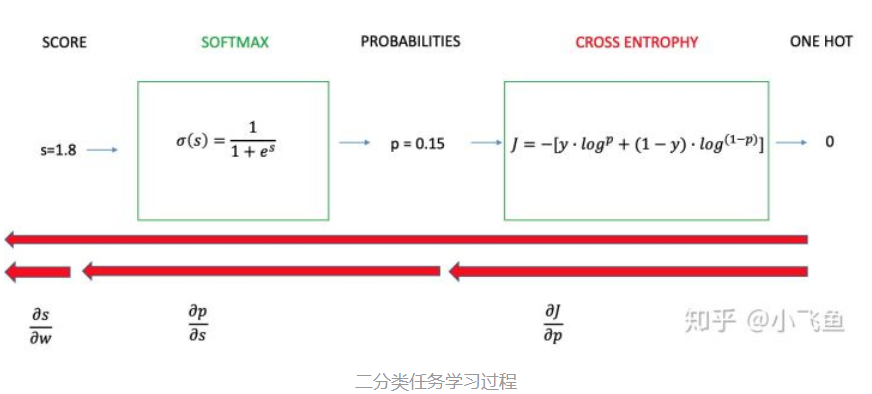



模型学习的速度取决于两个值：一、学习率；二、偏导值
偏导值的大小取决于 [公式] 和 [公式]该值越大，说明模型效果越差，但是该值越大同时也会使得偏导值越大，从而模型学习速度更快。所以，使用逻辑函数得到概率，并结合交叉熵当损失函数时，在模型效果差的时候学习速度比较快，在模型效果好的时候学习速度变慢。


辑回归配合MSE损失函数时，采用梯度下降法进行学习时，会出现模型一开始训练时，学习速率非常慢的情况








问题：三个激活函数各自特点

计算量：

sigmoid：指数运算在计算中过于复杂，不利于运算

导数

sigmoid：输入值特别大或者特别小的时候求出来的梯度特别小，当网络较深，反向传播时梯度一乘就没有了，这是sigmoid函数的饱和特性导致的。中间部分梯度值过小（最大只有0.25）,因此即使在中间部分也没有办法明显的激活，反而会在多层中失活，表现非常不好

relu：在负向部分完全失活，如果选择的超参数不好等情况，可能会出现过多神经元失活，因为当学习率特别大，对于有的输入在参数更新时可能会让某些神经元直接失活，以后遇到什么样的输入输出都是0，Leaky ReLU输入小于0的部分用很小的斜率，有助于缓解这个问题。


问题：激活函数的适用场景由函数的什么特性决定，激活函数的适用场景

首先要明确的，每种激活函数都有自己的特点，没有绝对完美的选择。对于非线性激活函数来说，只要是选择的函数满足可导性和单调性等激活函数的基本性质，就可以作为激活函数使用，只不过是选择这个激活函数后网络的和效果好坏罢了。


来自讨论区的问题


问题：为什么选择的激活函数普遍具有梯度消失的特点?这样不就让部分神经元失活使最后结果出问题吗？


回答：因为是基于模拟人脑的生物神经网络。在2001年有研究表明生物脑的神经元工作具有稀疏性，这样可以节约尽可能多的能量，据研究，只有大约1%-4%的神经元被激活参与，绝大多数情况下，神经元是处于抑制状态的，因此ReLu函数反而是更加优秀的近似生物激活函数。所以抑制现象是必须发生的，这样能更好的拟合特征。



In [1]:
问题二不懂

# 数据操作

In [7]:
import numpy as np

##广播机制

A = np.arange(3).reshape((3, 1))
B = np.arange(2).reshape((1, 2))
print(A,'\n',B)
A+B

[[0]
 [1]
 [2]] 
 [[0 1]]


array([[0, 1],
       [1, 2],
       [2, 3]])